In [1]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
target_col = 'DEATH_EVENT'

Загружаем обработанный в прошлой ЛР датасет

In [2]:
ds = pd.read_csv('../data/out.csv')

In [3]:
ds.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,1
4,65.0,1,160.0,1,20.0,0,327000.00,2.7,116.0,0,0,1


In [4]:
X = ds.drop(target_col, axis=1).to_numpy()
y = ds[target_col].to_numpy()

print(X.shape)
print(y.shape)

type(X)

(406, 11)
(406,)


numpy.ndarray

In [5]:
print(X[:5])

[[7.5000000e+01 0.0000000e+00 5.8200000e+02 0.0000000e+00 2.0000000e+01
  1.0000000e+00 2.6500000e+05 1.9000000e+00 1.3000000e+02 1.0000000e+00
  0.0000000e+00]
 [5.5000000e+01 0.0000000e+00 7.8610000e+03 0.0000000e+00 3.8000000e+01
  0.0000000e+00 2.6335803e+05 1.1000000e+00 1.3600000e+02 1.0000000e+00
  0.0000000e+00]
 [6.5000000e+01 0.0000000e+00 1.4600000e+02 0.0000000e+00 2.0000000e+01
  0.0000000e+00 1.6200000e+05 1.3000000e+00 1.2900000e+02 1.0000000e+00
  1.0000000e+00]
 [5.0000000e+01 1.0000000e+00 1.1100000e+02 0.0000000e+00 2.0000000e+01
  0.0000000e+00 2.1000000e+05 1.9000000e+00 1.3700000e+02 1.0000000e+00
  0.0000000e+00]
 [6.5000000e+01 1.0000000e+00 1.6000000e+02 1.0000000e+00 2.0000000e+01
  0.0000000e+00 3.2700000e+05 2.7000000e+00 1.1600000e+02 0.0000000e+00
  0.0000000e+00]]


Разбиваю на обучающую и тестовую выборку, после чего нормализую данные

In [6]:
from sklearn.preprocessing import normalize

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 1, shuffle = True)

train_X = normalize(train_X, norm="max", axis=0)
test_X = normalize(test_X, norm="max", axis=0)

print(train_X.shape)
print(train_y.shape)

print(test_X.shape)
print(test_y.shape)

(324, 11)
(324,)
(82, 11)
(82,)


In [7]:
from ML import *

In [8]:
gscv = GridSearchCV(Pipeline([('knn', kNN())]), {'knn__k' : [1, 3, 5, 7, 9]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'knn__k': 1}
Best acc: 0.7251442307692308


Accuracy: 0.7317073170731707
Recall: 0.7435897435897436
Precision: 0.7073170731707317


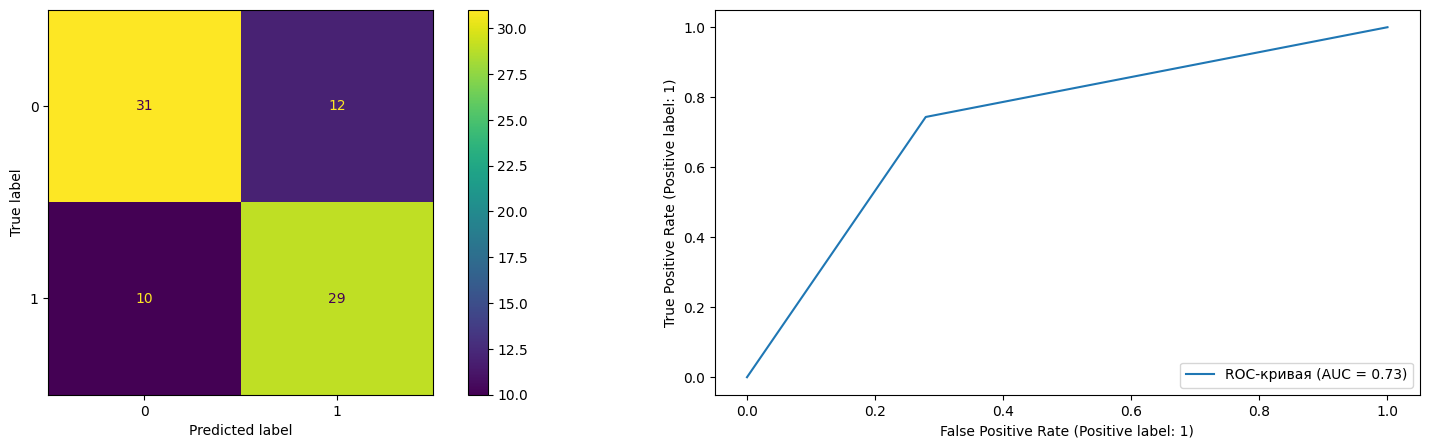

In [9]:
knn_best = gscv.best_estimator_
scores(knn_best, test_X, test_y)

In [10]:
f = open("kNN.pkl", "wb")
pickle.dump(gscv.best_estimator_, f, pickle.HIGHEST_PROTOCOL)
f.close()

[kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) из scikit-learn

In [11]:
from sklearn.neighbors import KNeighborsClassifier

gscv = GridSearchCV(Pipeline([('knn', KNeighborsClassifier())]), {'knn__n_neighbors' : [1, 3, 5, 7, 9]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'knn__n_neighbors': 1}
Best acc: 0.7251442307692308


Accuracy: 0.7317073170731707
Recall: 0.7435897435897436
Precision: 0.7073170731707317


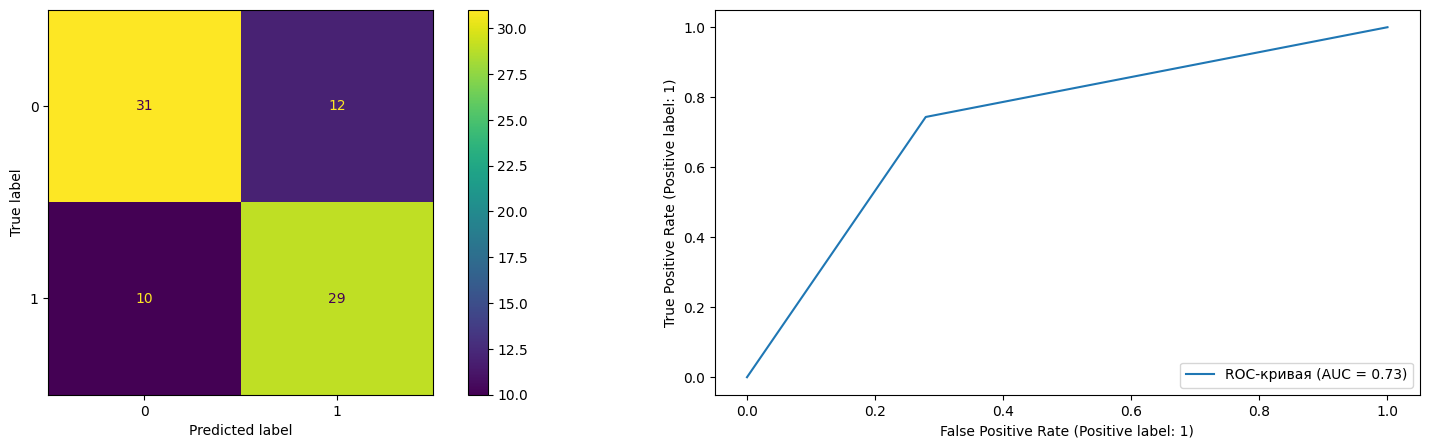

In [12]:
knn_best = gscv.best_estimator_
scores(knn_best, test_X, test_y)

In [13]:
gscv = GridSearchCV(Pipeline([("logreg", LogisticRegression(nin=train_X.shape[1]))]),
                    {"logreg__epoches" : [1, 2, 4],
                     "logreg__batch_size" : [5, 10, 20],
                     "logreg__SGD_step" : [0.01, 0.05, 0.1]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'logreg__SGD_step': 0.01, 'logreg__batch_size': 5, 'logreg__epoches': 4}
Best acc: 0.6696153846153846


Accuracy: 0.6585365853658537
Recall: 0.4358974358974359
Precision: 0.7391304347826086


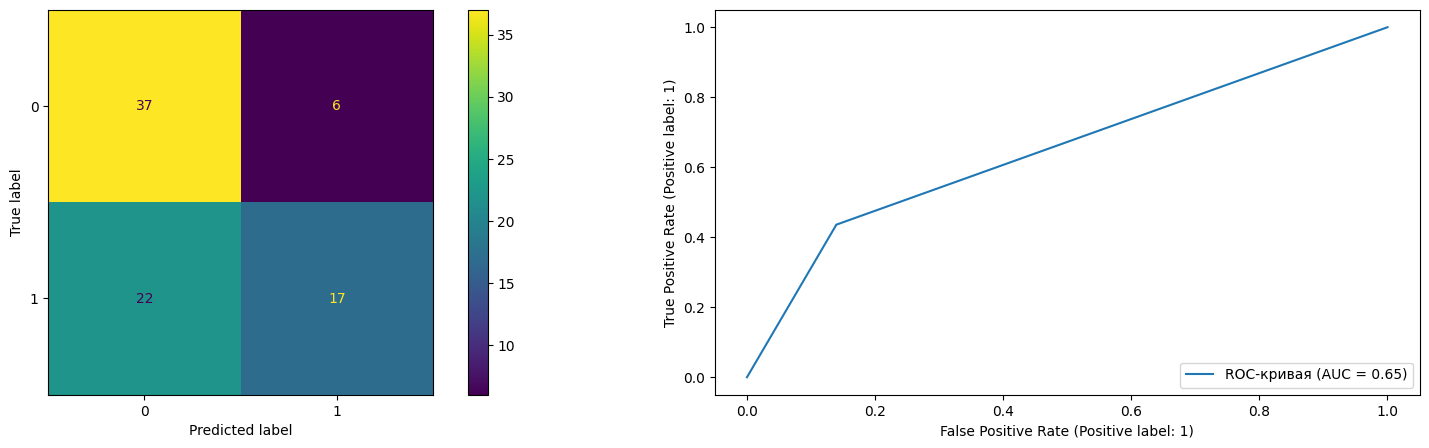

In [14]:
logreg_best = gscv.best_estimator_
scores(logreg_best, test_X, test_y)

In [15]:
rscv = RandomizedSearchCV(Pipeline([("logreg", LogisticRegression(nin=train_X.shape[1]))]),
                    {"logreg__epoches" : [1, 2, 4],
                     "logreg__batch_size" : [5, 10, 20],
                     "logreg__SGD_step" : [0.01, 0.05, 0.1]})
rscv.fit(train_X, train_y)
best(rscv)

Best params: {'logreg__epoches': 4, 'logreg__batch_size': 5, 'logreg__SGD_step': 0.01}
Best acc: 0.6664903846153847


Accuracy: 0.6585365853658537
Recall: 0.4358974358974359
Precision: 0.7391304347826086


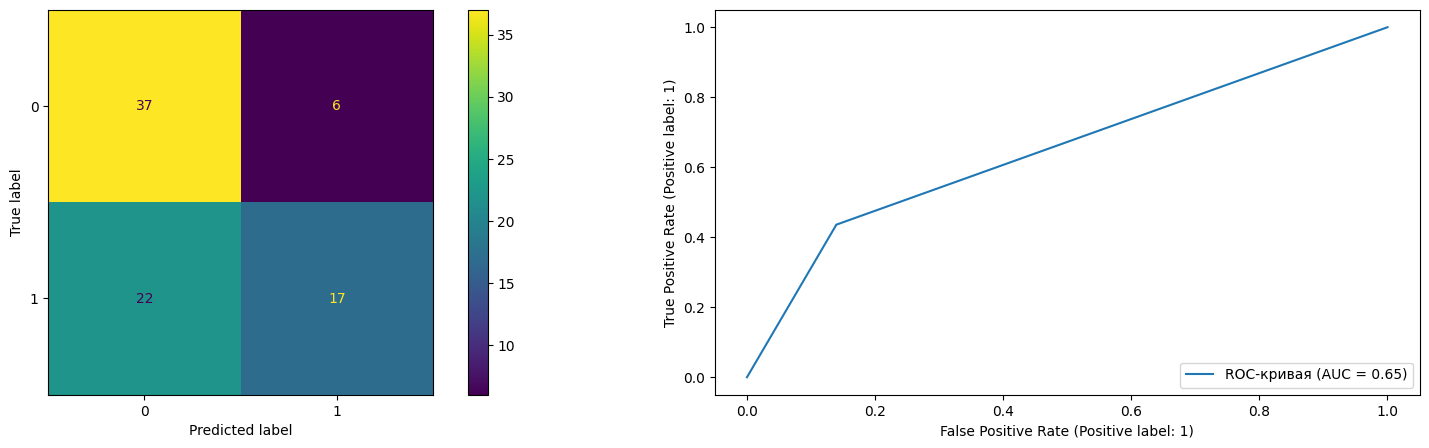

In [16]:
logreg_best = rscv.best_estimator_
scores(logreg_best, test_X, test_y)

In [17]:
f = open("logreg.pkl", "wb")
pickle.dump(logreg_best, f, pickle.HIGHEST_PROTOCOL)
f.close()

[Логистическая регрессия](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из scikit-learn

In [18]:
from sklearn.linear_model import LogisticRegression

gscv = GridSearchCV(Pipeline([("logreg", LogisticRegression())]),
                    {"logreg__penalty" : ["l2", "none"],
                     "logreg__solver" : ["newton-cg", "lbfgs"],
                     "logreg__max_iter" : [1000, 10000]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'logreg__max_iter': 1000, 'logreg__penalty': 'none', 'logreg__solver': 'newton-cg'}
Best acc: 0.7098557692307693


Accuracy: 0.8292682926829268
Recall: 0.7948717948717948
Precision: 0.8378378378378378


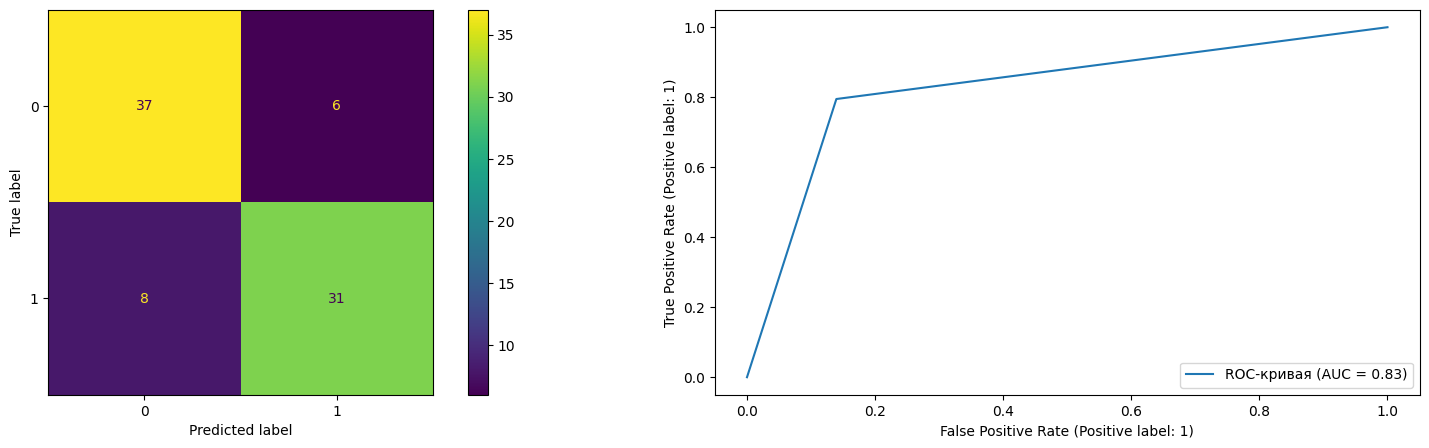

In [19]:
logreg_best = gscv.best_estimator_
scores(logreg_best, test_X, test_y)

In [20]:
gscv = GridSearchCV(Pipeline([("SVM", SVM(nin=train_X.shape[1]))]),
                    {"SVM__epoches" : [1, 2, 4],
                     "SVM__batch_size" : [5, 10, 20],
                     "SVM__SGD_step" : [0.01, 0.05, 0.1],
                     "SVM__alpha" : [1.0, 0.1, 0.01, 0.0]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'SVM__SGD_step': 0.1, 'SVM__alpha': 0.0, 'SVM__batch_size': 10, 'SVM__epoches': 4}
Best acc: 0.5738461538461539


Accuracy: 0.7439024390243902
Recall: 0.6410256410256411
Precision: 0.78125


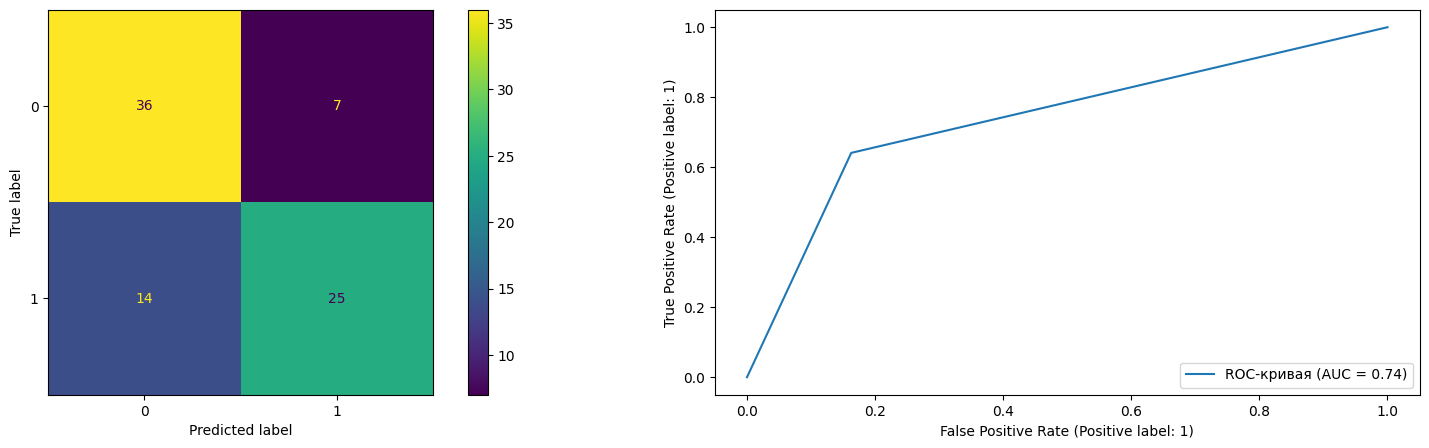

In [21]:
SVM_best = gscv.best_estimator_
scores(SVM_best, test_X, test_y)

Функция для отрисовки разделяющей прямой

In [22]:
def drawDataAndLine(W, b, X, y):
    n = X.shape[1]
    fig, ax = plt.subplots(n, n)
    for i in range(n):
        for j in range(n):
            ax[i][j].set_xlim(0.0, 1.0)
            ax[i][j].set_ylim(0.0, 1.0)
            if i==j:
                continue
            x_list0 = []
            y_list0 = []

            x_list1 = []
            y_list1 = []
            for (ii, elem) in enumerate(X):
                if (y[ii] == 1):
                    x_list1.append(elem[i])
                    y_list1.append(elem[j])
                elif (y[ii] == 0):
                    x_list0.append(elem[i])
                    y_list0.append(elem[j])
            ax[i][j].scatter(x_list1, y_list1, s = 10)
            ax[i][j].scatter(x_list0, y_list0, s = 10)

            line_x = np.linspace(0.0, 1.0, 100)
            line_y = -(W[i] * line_x + b) / W[j]
            ax[i][j].plot(line_x, line_y, "-r")
    fig.set_size_inches(fig.get_size_inches() * n)
    plt.tight_layout()
    plt.show()


In [23]:
f = open("SVM.pkl", "wb")
pickle.dump(SVM_best, f, pickle.HIGHEST_PROTOCOL)
f.close()

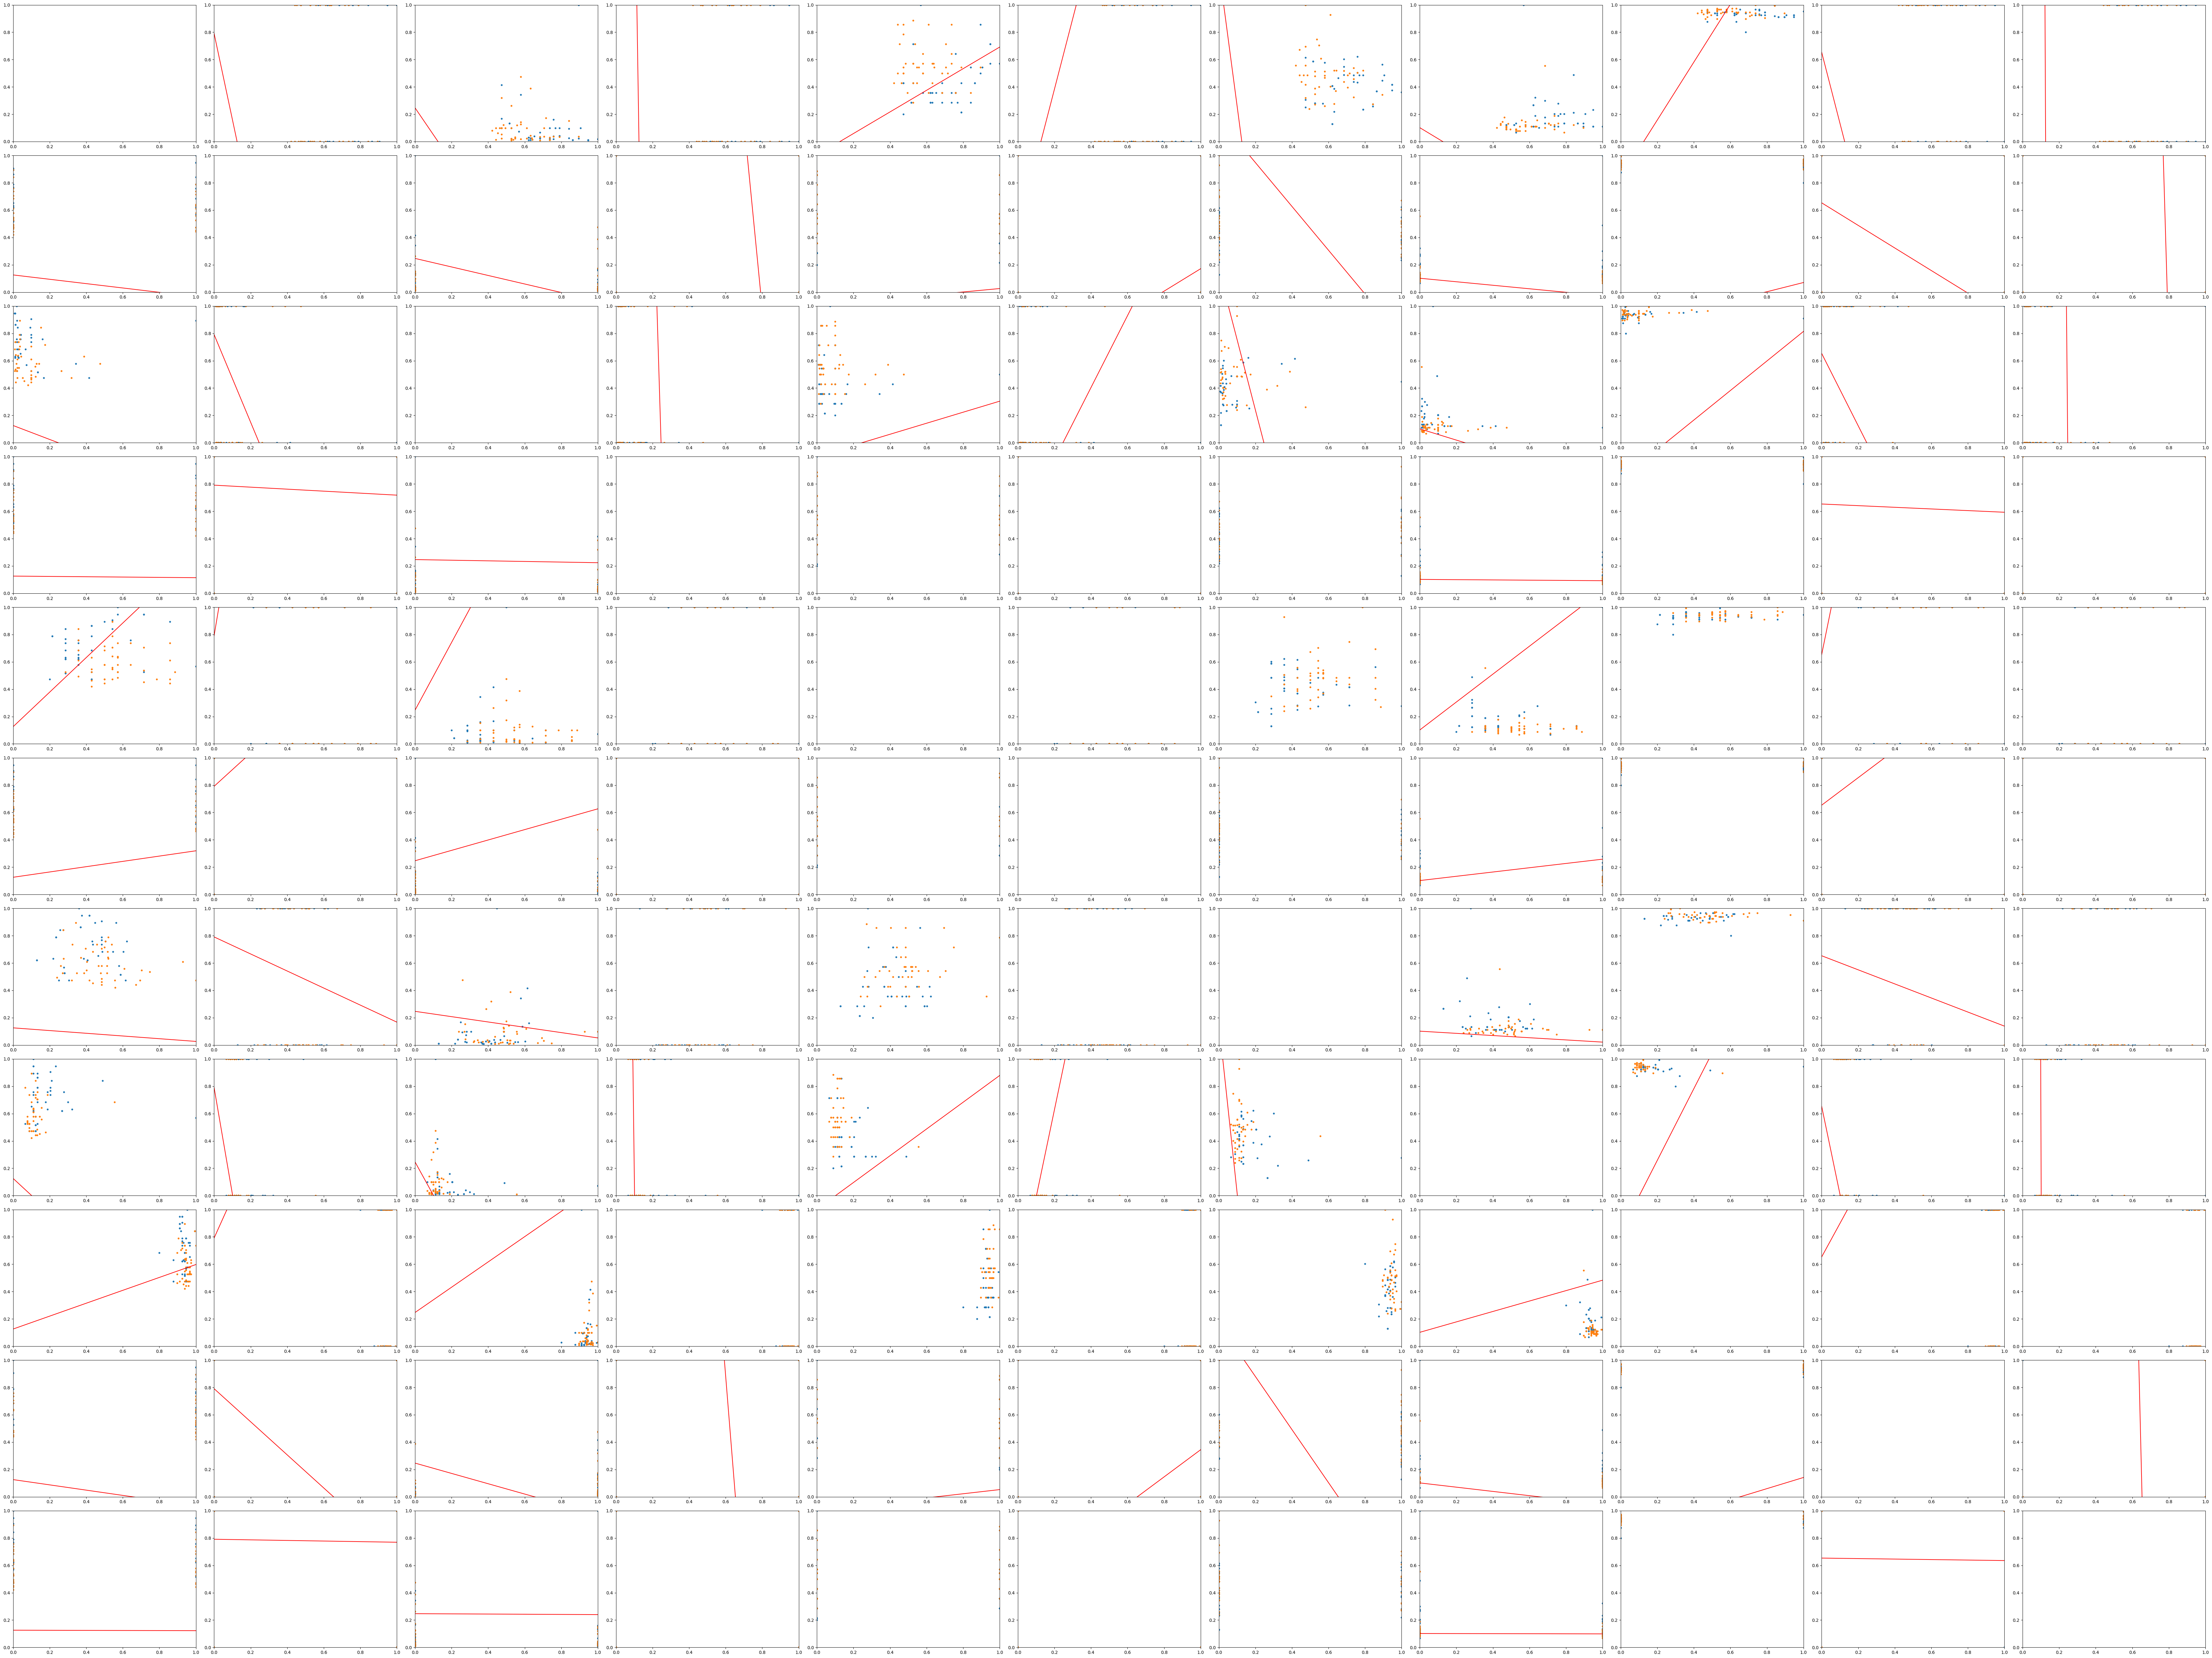

In [24]:
SVM_params = SVM_best[0].getW()
drawDataAndLine(SVM_params[0][:12], SVM_params[0][-1], test_X, test_y)

In [25]:
rscv = RandomizedSearchCV(Pipeline([("SVM", SVM(nin=train_X.shape[1]))]),
                    {"SVM__epoches" : [1, 2, 4],
                     "SVM__batch_size" : [5, 10, 20],
                     "SVM__SGD_step" : [0.01, 0.05, 0.1],
                     "SVM__alpha" : [1.0, 0.1, 0.01, 0.0]})
rscv.fit(train_X, train_y)
best(rscv)

Best params: {'SVM__epoches': 4, 'SVM__batch_size': 10, 'SVM__alpha': 0.1, 'SVM__SGD_step': 0.1}
Best acc: 0.5738461538461539


Accuracy: 0.6341463414634146
Recall: 0.7692307692307693
Precision: 0.5882352941176471


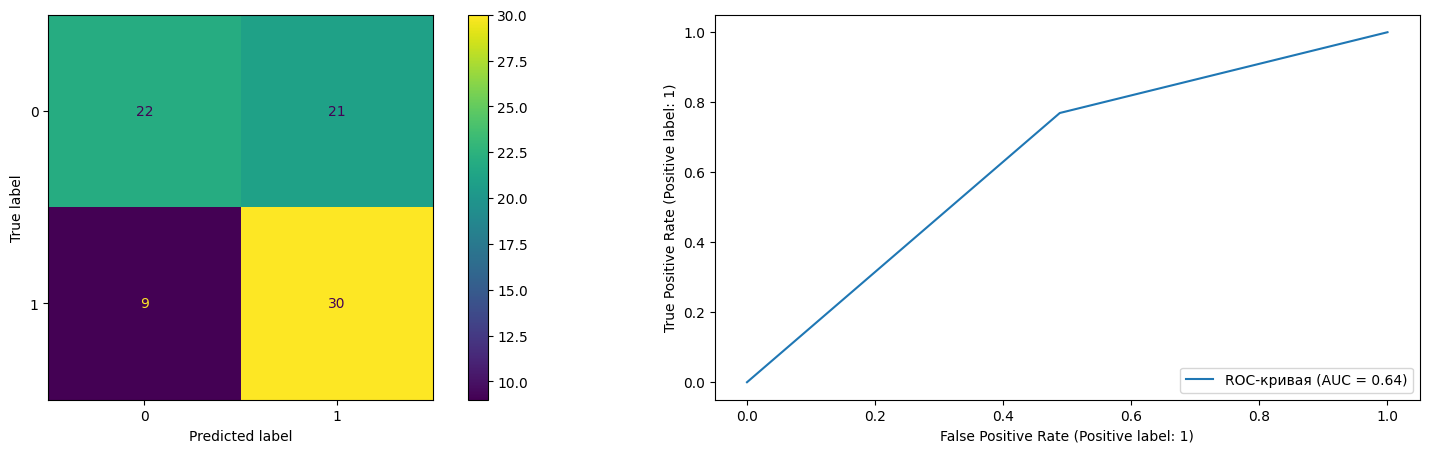

In [26]:
SVM_best = rscv.best_estimator_
scores(SVM_best, test_X, test_y)

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) из scikit-learn

In [27]:
from sklearn.svm import LinearSVC

gscv = GridSearchCV(Pipeline([("svc", LinearSVC())]),
                    {"svc__loss" : ["hinge", "squared_hinge"],
                     "svc__max_iter" : [1e5, 1e6]})
gscv.fit(train_X, train_y)
best(gscv)

Best params: {'svc__loss': 'squared_hinge', 'svc__max_iter': 100000.0}
Best acc: 0.709903846153846


Accuracy: 0.8048780487804879
Recall: 0.7692307692307693
Precision: 0.8108108108108109


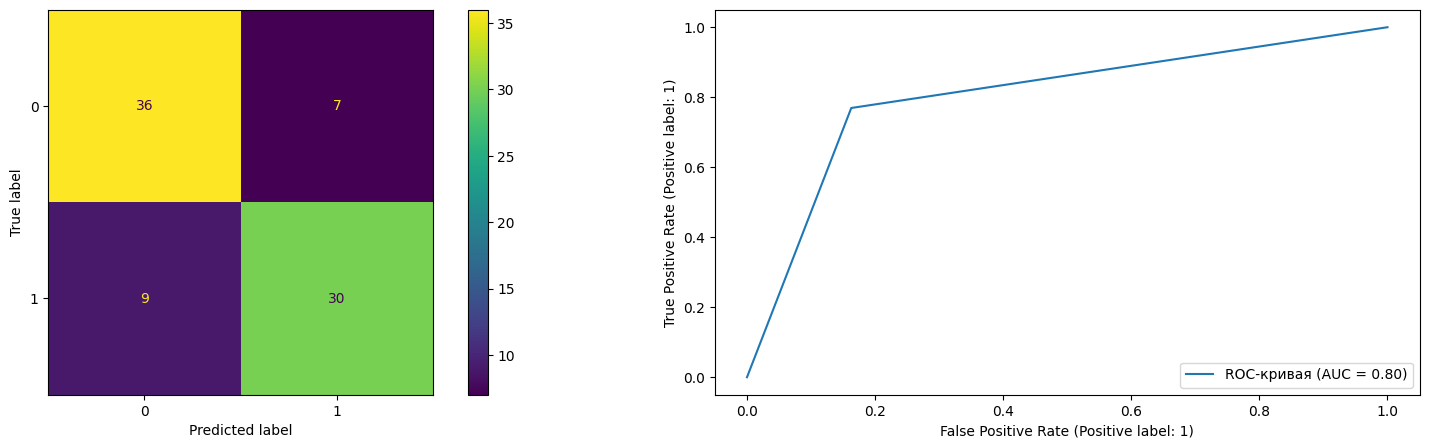

In [28]:
SVM_best = gscv.best_estimator_
scores(SVM_best, test_X, test_y)

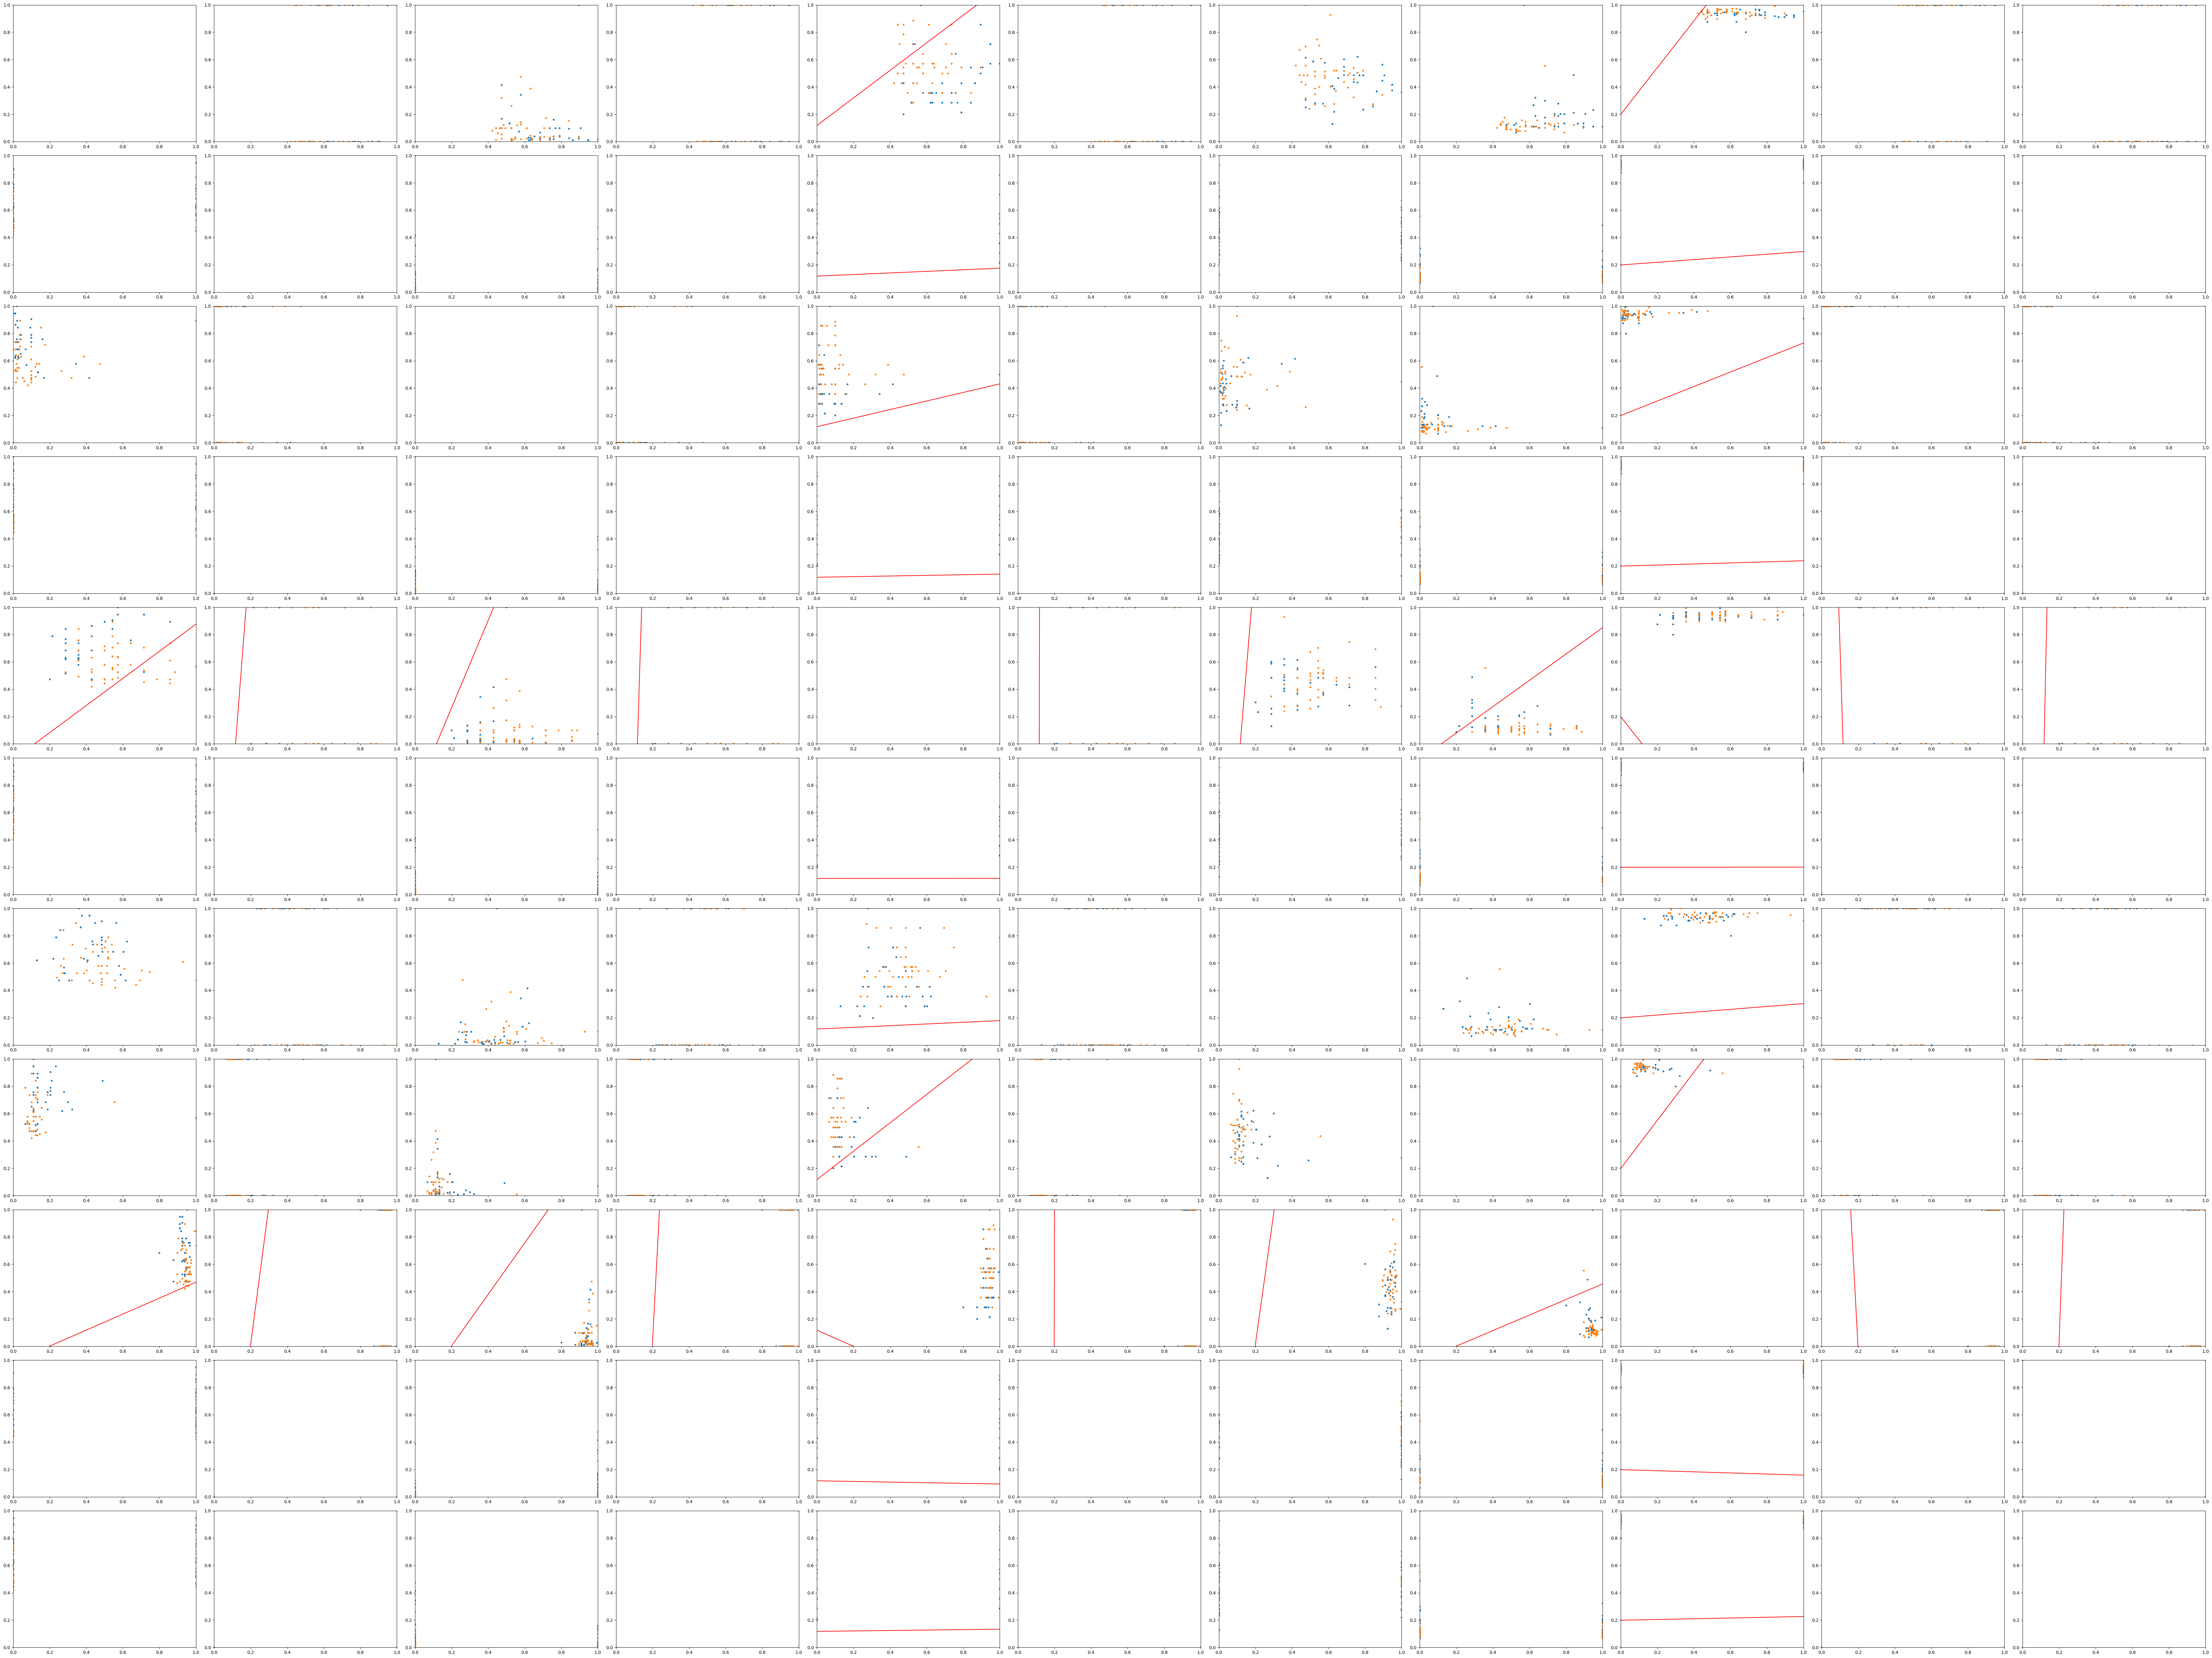

In [29]:
drawDataAndLine(SVM_best[0].coef_[0], SVM_best[0].intercept_[0], test_X, test_y)

Accuracy: 0.5609756097560976
Recall: 0.07692307692307693
Precision: 1.0


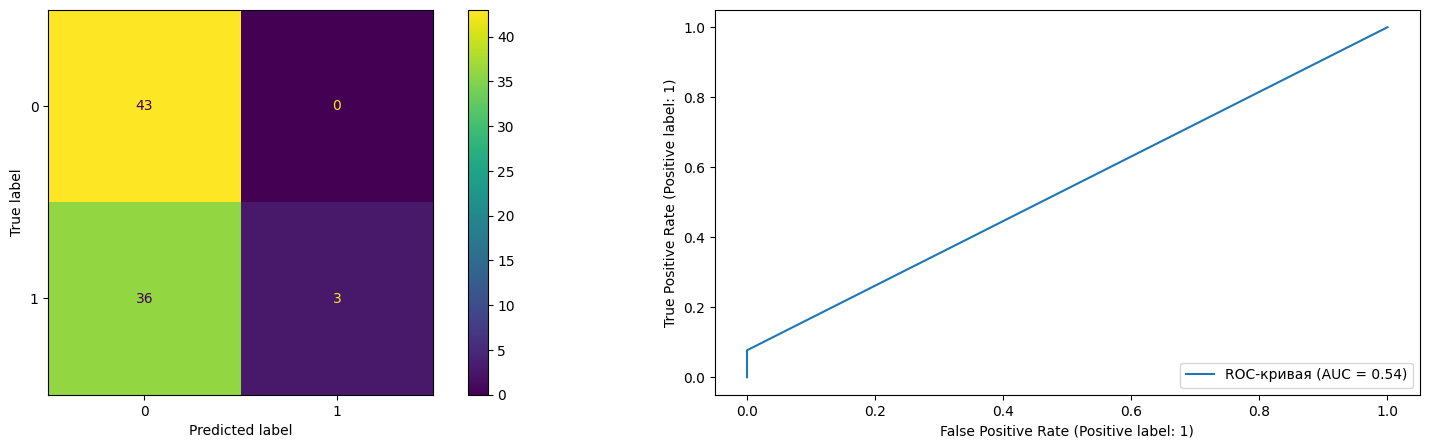

In [30]:
NB = Pipeline([("NB", NaiveBayes())])
NB.fit(train_X, train_y)
scores(NB, test_X, test_y)

In [31]:
f = open("NB.pkl", "wb")
pickle.dump(NB, f, pickle.HIGHEST_PROTOCOL)
f.close()

[Наивный байесовский классификатор](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) из scikit.learn

Accuracy: 0.7439024390243902
Recall: 0.5641025641025641
Precision: 0.8461538461538461


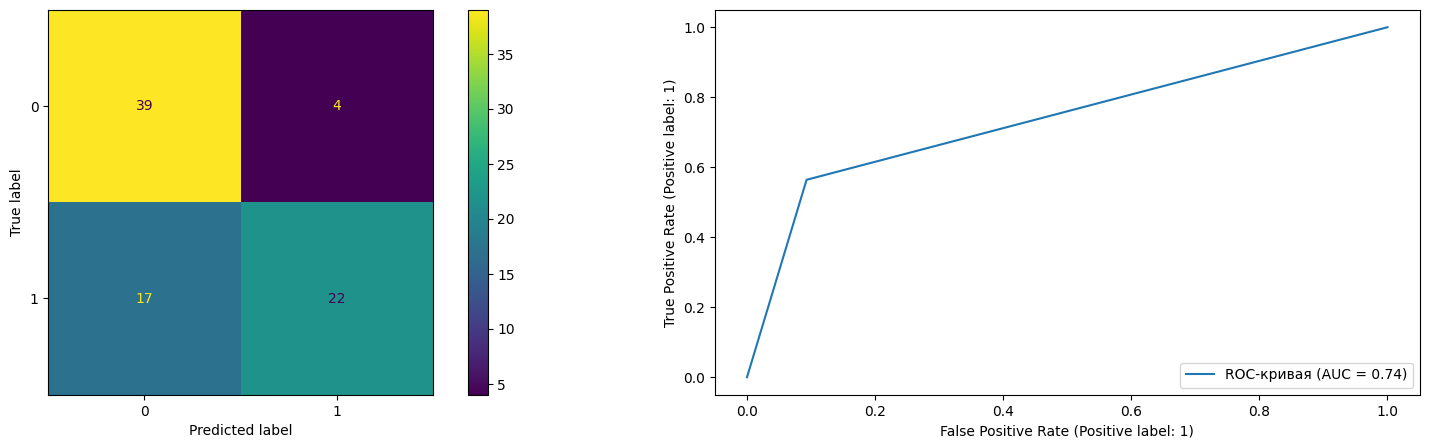

In [32]:
from sklearn.naive_bayes import GaussianNB

NB = Pipeline([("NB", GaussianNB())])
NB.fit(train_X, train_y)
scores(NB, test_X, test_y)